In [8]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder, OneHotCategoricalEncoder
from feature_engine import variable_transformers as vt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.5f}'.format

In [9]:
raw_data = pd.read_csv('Data/house_data_details_cleaned.csv')
df = raw_data.copy()

In [198]:
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
#profile.to_file("RealEstateAVM_ProfileReport.html")

In [199]:
df.head()

,latitude,longitude,address,property_type,home_size,lot_size,year_built,parcel_number,realtyID,county,subdivision,census,tract,lot,zoning,date,sale_price,estimated_value,sex_offenders,crime_index,enviornmental_hazards,natural_disasters,school quality,url,bedrooms,bathrooms
0,33.97462,-118.13368,6224 Nye St,Condominium,1357.00000,22215.60000,1988.00000,6357012043,1111054477.00000,Los Angeles,45351,1.00000,532304.00000,1,CMR3,2020-09-28,469000.00000,439000.00000,7,High,15,1,Average,https://www.realtytrac.com/property/ca/commerc...,3.00000,3.00000
1,34.15656,-118.39689,4723 Laurel Canyon Blvd,Restaurant,2250.00000,9799.00000,1959.00000,2356037034,1111055289.00000,Los Angeles,7360,1.00000,143400.00000,10,LAC2,2020-09-28,1910000.00000,nan,5,NaN,6,1,Excellent,https://www.realtytrac.com/property/ca/valley-...,nan,nan
2,34.67778,-118.45117,18118 Elizabeth Lake Rd,Apartment house (5+ units),1454.00000,13635.00000,1948.00000,3242015023,1111055911.00000,Los Angeles,NaN,2.00000,920102.00000,4,LCC4*,2020-09-28,325000.00000,nan,0,NaN,2,1,NaN,https://www.realtytrac.com/property/ca/lake-hu...,7.00000,6.00000
3,34.07296,-118.06690,9259 Ramona Blvd,Single Family Residence,1682.00000,7000.00000,1978.00000,8594027016,1111055994.00000,Los Angeles,ROSEMEAD,2.00000,432901.00000,6,RMPOD*,2020-09-28,738000.00000,752000.00000,3,Moderate,11,1,Excellent,https://www.realtytrac.com/property/ca/rosemea...,3.00000,2.00000
4,33.77772,-118.15491,825 Obispo Ave,"Triplex (3 units, any combination)",1958.00000,6754.00000,1938.00000,7258013016,1111056010.00000,Los Angeles,1,2.00000,576904.00000,18,LBR2N,2020-09-28,1185000.00000,989000.00000,11,Slightly High,8,1,Average,https://www.realtytrac.com/property/ca/long-be...,4.00000,3.00000


In [200]:
df.describe()

,latitude,longitude,home_size,lot_size,year_built,parcel_number,realtyID,census,tract,sale_price,estimated_value,sex_offenders,enviornmental_hazards,natural_disasters,bedrooms,bathrooms
count,6303.00000,6303.00000,6068.00000,6284.00000,6105.00000,6378.00000,6377.00000,6307.00000,6307.00000,6158.00000,5816.00000,6378.00000,6378.00000,6378.00000,5835.00000,5835.00000
mean,34.11095,-118.27010,2411.11239,42424.13440,1963.97674,5032195797.98322,1111176692.71084,2.02521,445313.17409,1106153.90224,883116.74691,7.53873,6.97727,1.20194,3.43925,2.68535
std,0.22482,0.21373,6256.05000,236622.96125,26.25626,2112498553.43211,246438.83776,1.12090,258664.78750,1971336.30139,522479.94599,13.14695,6.89617,0.43087,3.26813,3.09168
min,33.33958,-118.88275,3.00000,283.00000,1883.00000,2004009012.00000,1110722482.00000,1.00000,0.00000,500.00000,104000.00000,0.00000,1.00000,0.00000,1.00000,1.00000
25%,33.96968,-118.42598,1230.00000,6006.75000,1948.00000,3004006266.50000,1110958043.00000,1.00000,215500.50000,499000.00000,544975.00000,1.00000,3.00000,1.00000,2.00000,2.00000
50%,34.08769,-118.29211,1625.00000,7653.50000,1961.00000,5082013518.00000,1111202901.00000,2.00000,408703.00000,705500.00000,712000.00000,4.00000,5.00000,1.00000,3.00000,2.00000
75%,34.18876,-118.12894,2302.00000,17284.50000,1984.00000,7138026760.25000,1111392666.00000,3.00000,601851.00000,1114375.00000,1050000.00000,9.00000,8.00000,1.00000,4.00000,3.00000
max,34.81875,-117.61020,295336.80000,12486474.00000,2020.00000,8765016012.00000,1111598375.00000,8.00000,980008.00000,75454545.00000,2998000.00000,135.00000,91.00000,3.00000,96.00000,99.00000


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               6303 non-null   float64
 1   longitude              6303 non-null   float64
 2   address                6367 non-null   object 
 3   property_type          6378 non-null   object 
 4   home_size              6068 non-null   float64
 5   lot_size               6284 non-null   float64
 6   year_built             6105 non-null   float64
 7   parcel_number          6378 non-null   int64  
 8   realtyID               6377 non-null   float64
 9   county                 6378 non-null   object 
 10  subdivision            5885 non-null   object 
 11  census                 6307 non-null   float64
 12  tract                  6307 non-null   float64
 13  lot                    5970 non-null   object 
 14  zoning                 6378 non-null   object 
 15  date

In [10]:
#Remove missing values for the target feature
df.dropna(inplace=True)
print(f'Number of observations before removing missing values: {raw_data.shape[0]}')
print(f'Number of observations after removing missing values: {df.shape[0]}')

Number of observations before removing missing values: 6378
Number of observations after removing missing values: 4263


In [11]:
#Convert date into a datetime object
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', ascending=False, inplace=True, ignore_index=True)
df['date']

0      2069-09-19
1      2069-07-01
2      2069-04-23
3      2069-01-22
4      2067-12-13
          ...    
4258   1970-11-23
4259   1970-10-06
4260   1970-09-22
4261   1970-08-14
4262   1970-02-10
Name: date, Length: 4263, dtype: datetime64[ns]

In [12]:
#Correct the dates
df['date'] = df['date'].apply(lambda x: x.replace(year= x.year-100) if x.year>2020 else x)
df.sort_values(by='date', ascending=False, inplace=True, ignore_index=True)
df['date']

0      2020-10-09
1      2020-10-09
2      2020-10-09
3      2020-10-09
4      2020-10-09
          ...    
4258   1967-12-13
4259   1966-11-29
4260   1965-01-11
4261   1964-12-18
4262   1964-07-02
Name: date, Length: 4263, dtype: datetime64[ns]

In [13]:
#We need to adjust the prices based on inflation
#Add a new column that will be used for the merge
df['observation_date'] = df['date'].values.astype('datetime64[M]')

#Read in a file with consumer price index
cpi_df = pd.read_csv('CPIAUCNS.csv')
cpi_df['observation_date'] = pd.to_datetime(cpi_df['observation_date'])
cpi_df.sort_values(by='observation_date', ascending=False, inplace=True, ignore_index=True)
cpi_df['observation_date'] = cpi_df['observation_date'].apply(lambda x: x.replace(year= x.year-100) if x.year>2020 else x)
cpi_df.sort_values(by='observation_date', ascending=False, inplace=True, ignore_index=True)

df = pd.merge(df, cpi_df, on='observation_date', how='left')
df.drop_duplicates(subset=['address'], inplace=True)
df.rename(columns={'CPIAUCNS':'cpi'}, inplace=True)
df[:5]

,latitude,longitude,address,property_type,home_size,lot_size,year_built,parcel_number,realtyID,county,subdivision,census,tract,lot,zoning,date,sale_price,estimated_value,sex_offenders,crime_index,enviornmental_hazards,natural_disasters,school quality,url,bedrooms,bathrooms,observation_date,cpi
0,34.41838,-118.44562,17902 Stillmore St,Single Family Residence,1196.00000,7867.00000,1961.00000,2844008001,1111559154.00000,Los Angeles,25916,1.00000,920039.00000,6,SCUR2,2020-10-09,417000.00000,568700.00000,1,Low,6,1,Excellent,https://www.realtytrac.com/property/ca/santa-c...,3.00000,2.00000,2020-10-01,260.28000
2,34.17455,-118.34000,2805 W Chandler Blvd,Single Family Residence,950.00000,2750.00000,1954.00000,2478008002,1111549760.00000,Los Angeles,9852,2.00000,311300.00000,52,BUR1*,2020-10-09,770000.00000,684100.00000,4,Low,5,1,Above Average,https://www.realtytrac.com/property/ca/burbank...,2.00000,1.00000,2020-10-01,260.28000
4,33.81235,-118.38114,280 Via Linda Vis,Single Family Residence,2029.00000,7007.00000,1948.00000,7514018019,1111567119.00000,Los Angeles,10302,4.00000,651304.00000,19,TORR-LO,2020-10-09,1250000.00000,1437000.00000,3,Low,3,2,Excellent,https://www.realtytrac.com/property/ca/redondo...,2.00000,2.00000,2020-10-01,260.28000
6,33.99928,-117.99154,14852 Edgeridge Dr,Single Family Residence,3046.00000,51836.40000,1949.00000,8221018031,1111565735.00000,Los Angeles,2610,2.00000,408402.00000,13,LCA110000*,2020-10-09,1225000.00000,1061000.00000,0,Moderate,2,1,Above Average,https://www.realtytrac.com/property/ca/haciend...,3.00000,2.00000,2020-10-01,260.28000
8,34.07099,-117.99388,12844 Waltham St,Single Family Residence,1080.00000,12251.00000,1947.00000,8556005010,1111564332.00000,Los Angeles,10104,3.00000,404701.00000,283,BPR1*,2020-10-09,480000.00000,558900.00000,4,Moderate,3,1,Average,https://www.realtytrac.com/property/ca/baldwin...,3.00000,1.00000,2020-10-01,260.28000


In [14]:
df['cpi_multiplier'] = df['cpi'].iloc[0] / df['cpi']
df['sale_price'] = df['cpi_multiplier'] * df['sale_price']

In [85]:
#Add a month and year column
df['month'] = df['date'].dt.to_period('M')
df['month']

0       2020-10
1       2020-10
2       2020-10
3       2020-10
4       2020-10
         ...   
4258    1967-12
4259    1966-11
4260    1965-01
4261    1964-12
4262    1964-07
Name: month, Length: 4263, dtype: period[M]

In [86]:
#Add just a year column
df['year'] = df['date'].dt.to_period('Y')
df['year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4258    1967
4259    1966
4260    1965
4261    1964
4262    1964
Name: year, Length: 4263, dtype: period[A-DEC]

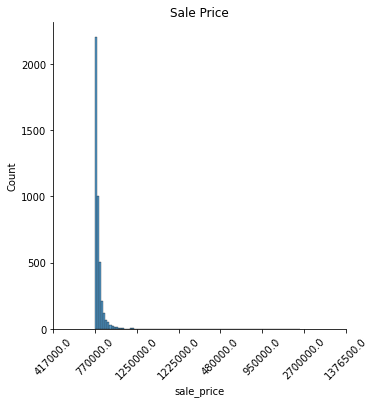

In [15]:
chart = sns.displot(df['sale_price'], bins=100)
plt.title('Sale Price')
plt.ticklabel_format(style='plain', axis='x')
chart.set(xticklabels=df['sale_price'])
chart.set_xticklabels(rotation=45);

In [16]:
#This function will identify the outlier boundaries for a variable

def find_skewed_boundaries(df, var, distance):
    
    IQR = df['sale_price'].quantile(.75) - df['sale_price'].quantile(.25)
    
    lower_boundary = df['sale_price'].quantile(.25) - (distance*IQR)
    upper_boundary = df['sale_price'].quantile(.75) + (distance*IQR)
    
    return upper_boundary, lower_boundary


sales_upper_boundary, sales_lower_boundary = find_skewed_boundaries(df, 'sale_price', 1.5)
print(f'The sale price upper boundary is {sales_upper_boundary}')

df_trimmed = df.loc[df['sale_price']<sales_upper_boundary,:]
print(f'Number of observations before removing outliers: {df.shape[0]}')
print(f'Number of observations after removing outliers: {df_trimmed.shape[0]}')

The sale price upper boundary is 23313750.0
Number of observations before removing outliers: 4259
Number of observations after removing outliers: 4010


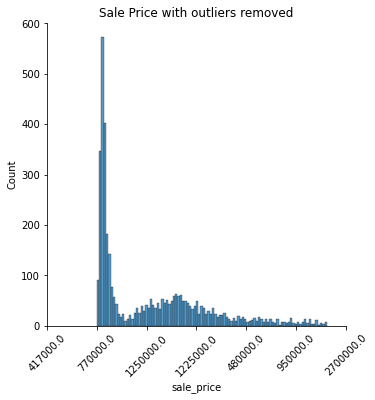

In [17]:
chart = sns.displot(df_trimmed['sale_price'], bins=100)
plt.title('Sale Price with outliers removed')
plt.ticklabel_format(style='plain', axis='x')
chart.set(xticklabels=df_trimmed['sale_price'])
chart.set_xticklabels(rotation=45);

### Variable Transformers

In [41]:
#Log Transformer
lt = vt.LogTransformer(variables = ['sale_price'])
lt.fit(df_trimmed)

temp = lt.transform(df_trimmed)

#Recirprocal Transformer
rt = vt.ReciprocalTransformer(variables = ['sale_price'])
rt.fit(df_trimmed)

temp = rt.transform(df_trimmed)

#Power Transformer
et = vt.PowerTransformer(variables = ['sale_price'])
et.fit(df_trimmed)

temp = et.transform(df_trimmed)

#Box Cox Transformer
bct = vt.BoxCoxTransformer(variables = ['sale_price'])
bct.fit(df_trimmed)

temp = bct.transform(df_trimmed)

#Yeo Johnson Transformer
yjt = vt.YeoJohnsonTransformer(variables = ['sale_price'])
yjt.fit(df_trimmed)

temp = bct.transform(df_trimmed)

In [230]:
#Remove any houses in Catalina Island as they can be considered outliers
print(f'Number of observations before removing outliers: {df_trimmed.shape[0]}')
df_trimmed = df_trimmed.loc[df['latitude']>33.6,:]
print(f'Number of observations after removing outliers: {df_trimmed.shape[0]}')

Number of observations before removing outliers: 4010
Number of observations after removing outliers: 4006


In [231]:
temp = pd.concat([df_trimmed.groupby('property_type')['sale_price'].mean(), df_trimmed.groupby('property_type')['sale_price'].count(), df['property_type'].value_counts(normalize=True)], axis=1)
temp.columns = ['Average sale price', 'Count of property_type', 'Percentage of property type']
temp.sort_values(by=['Count of property_type'], axis=0,ascending=False, inplace=True)
print(f'Number of categories for property_type: {df_trimmed.property_type.nunique()}')
temp

Number of categories for property_type: 11


,Average sale price,Count of property_type,Percentage of property type
Single Family Residence,5545470.66380,2869,0.72106
Condominium,4640751.75720,657,0.15614
"Duplex (2 units, any combination)",5138418.32664,173,0.04203
Planned Unit Development (PUD),4746147.69567,137,0.03311
"Triplex (3 units, any combination)",5524965.57630,62,0.01597
Apartment house (5+ units),5535776.18708,57,0.01784
"Quadplex (4 Units, Any Combination)",6628860.83337,42,0.01174
Residential - Vacant Land,2972552.76292,5,0.00117
Mobile home,422500.00000,2,0.00047
MISCELLANEOUS (Commercial),894546.84318,1,0.00023


In [232]:
bad_prop_types = ['MISCELLANEOUS   (Commercial)', 'Religious, Church, Worship (Synagogue, Temple, Parsonage)', 'Residential - Vacant Land', 'Mobile home']
print(f'Number of observations before removing infrequent property types: {df_trimmed.shape[0]}')

for col in bad_prop_types:
    indexNames = df_trimmed[(df_trimmed['property_type']==col)].index
    df_trimmed.drop(indexNames, inplace=True)
    

print(f'Number of observations after removing infrequent property types: {df_trimmed.shape[0]}')

Number of observations before removing infrequent property types: 4006
Number of observations after removing infrequent property types: 3997


In [233]:
temp2 = pd.concat([df_trimmed.groupby('property_type')['sale_price'].mean(), df_trimmed.groupby('property_type')['sale_price'].count(), df['property_type'].value_counts(normalize=True)], axis=1)
temp2.columns = ['Average sale price', 'Count of property_type', 'Percentage of property type']
temp2.sort_values(by=['Average sale price'], axis=0,ascending=False, inplace=True)
print(f'Number of categories for property_type: {df_trimmed.property_type.nunique()}')
temp2

Number of categories for property_type: 7


,Average sale price,Count of property_type,Percentage of property type
"Quadplex (4 Units, Any Combination)",6628860.83337,42.00000,0.01174
Single Family Residence,5545470.66380,2869.00000,0.72106
Apartment house (5+ units),5535776.18708,57.00000,0.01784
"Triplex (3 units, any combination)",5524965.57630,62.00000,0.01597
"Duplex (2 units, any combination)",5138418.32664,173.00000,0.04203
Planned Unit Development (PUD),4746147.69567,137.00000,0.03311
Condominium,4640751.75720,657.00000,0.15614
Residential - Vacant Land,nan,nan,0.00117
Mobile home,nan,nan,0.00047
"Religious, Church, Worship (Synagogue, Temple, Parsonage)",nan,nan,0.00023


In [234]:
def property_type_plot(df, var):
    
    categories = list(df[var].unique())
    df_copy = df.copy()
    
    for cat in categories:
        df = df_copy.loc[df_copy[var]==cat, :]
        if df.shape[0]>40:
            df.groupby('month')['sale_price'].mean().plot(figsize=(12,8))
            plt.ticklabel_format(style='plain', axis='y')
            plt.xlim('2015-01', df['month'].max())
            plt.ylim(df['sale_price'].min(), 4000000)
            plt.title(f'Average Sale Price by Month for {cat}')
            plt.show();
        else:
            continue

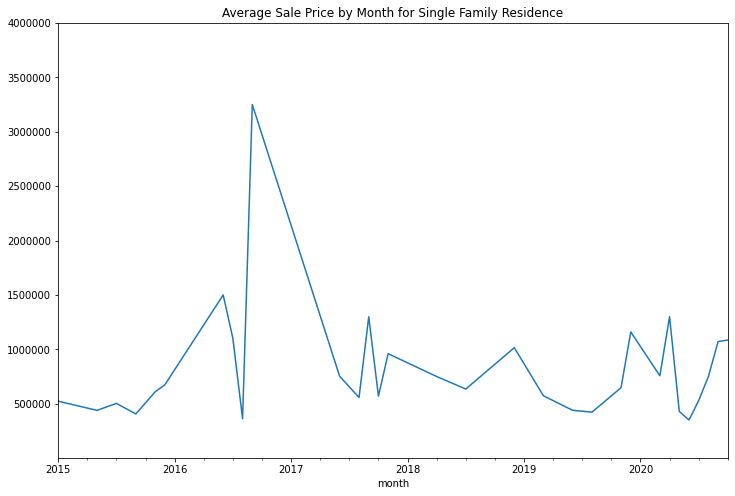

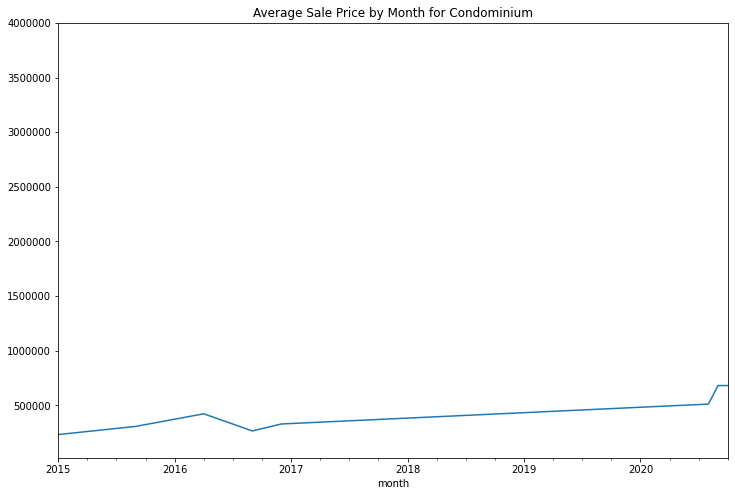

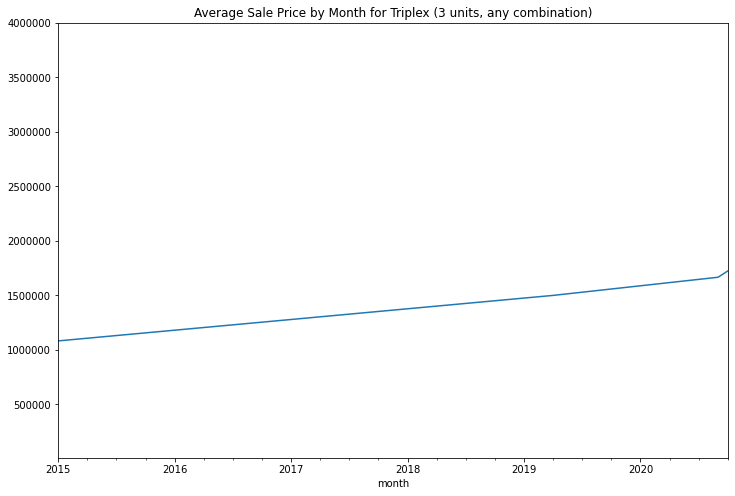

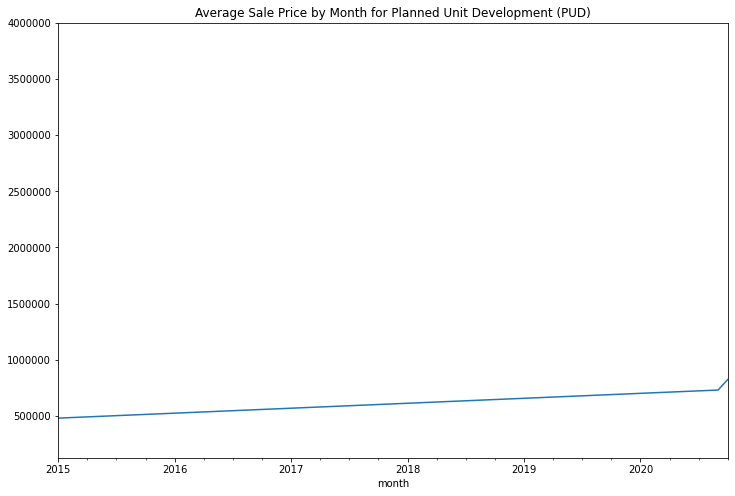

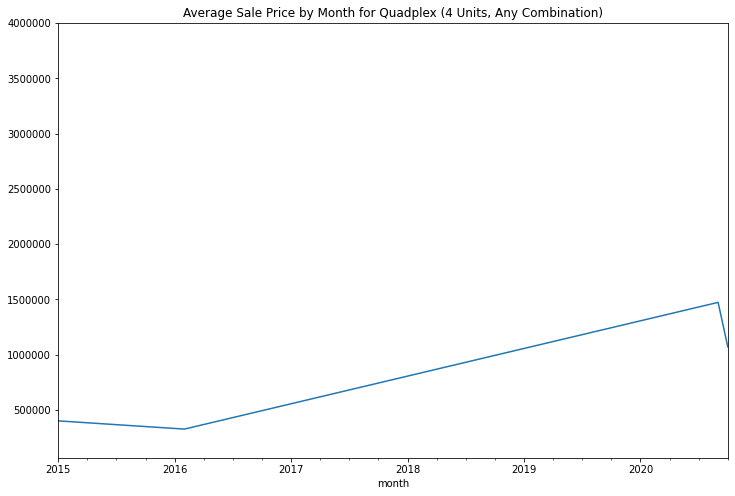

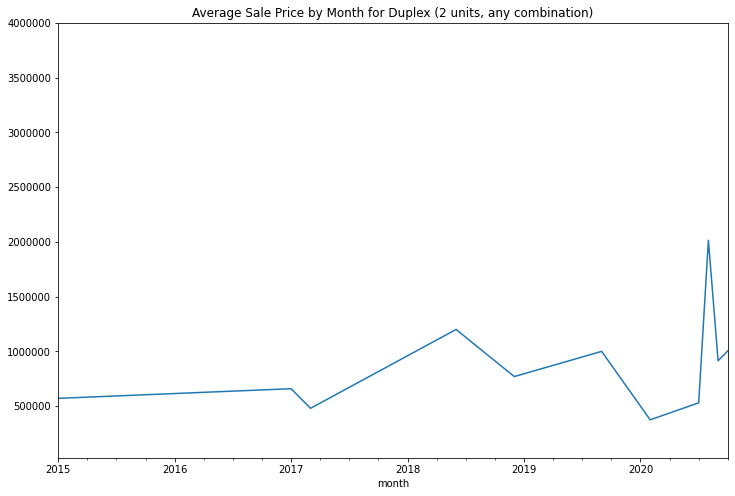

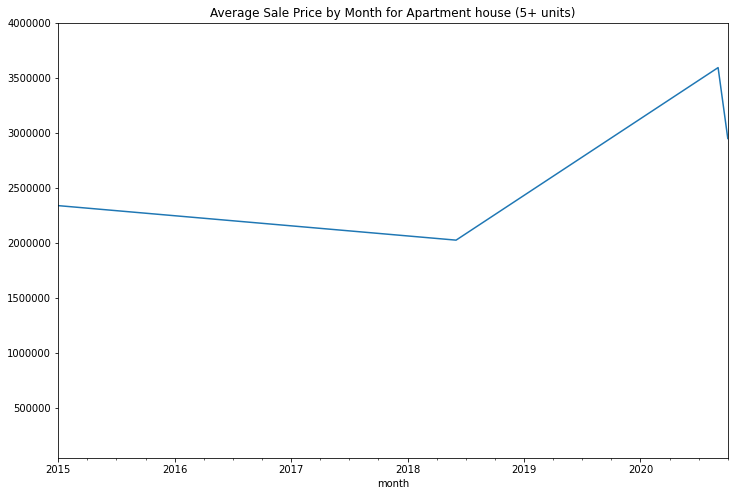

In [73]:
property_type_plot(df, 'property_type')

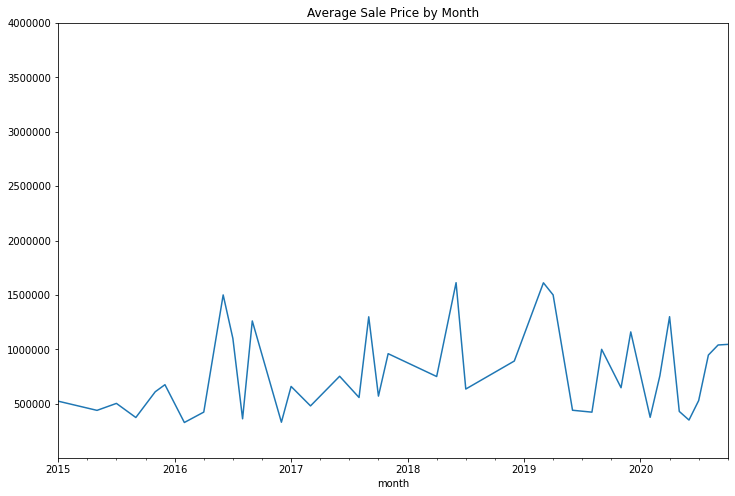

In [74]:
#Examine the trend of saleprice by month
df.groupby('month')['sale_price'].mean().plot(figsize=(12,8))
plt.ticklabel_format(style='plain', axis='y')
plt.xlim('2015-01', df['month'].max())
plt.ylim(df['sale_price'].min(), 4000000)
plt.title('Average Sale Price by Month');

In [235]:
ohe_encoder = OneHotCategoricalEncoder(top_categories=7,
                                       variables=['property_type', 'crime_index', 'school quality'])

ohe_encoder.fit(df_trimmed)

temp = ohe_encoder.transform(df_trimmed)

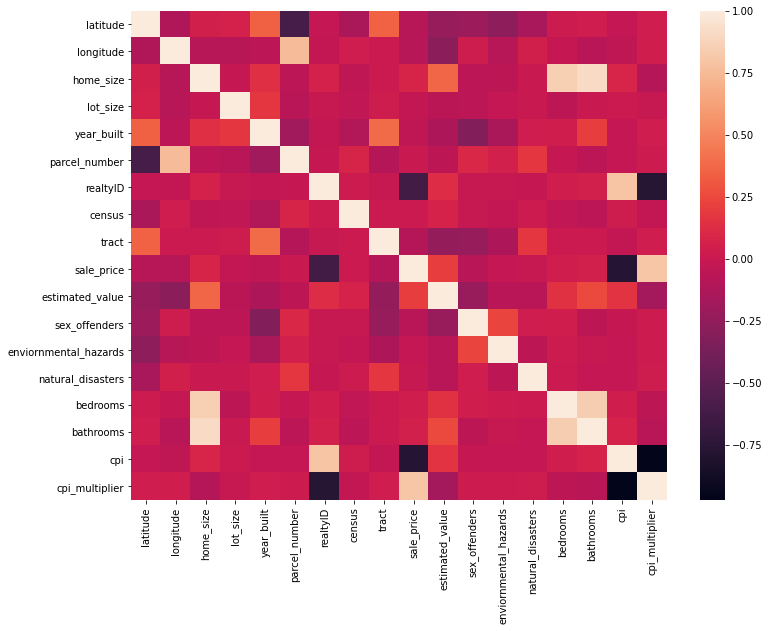

In [236]:
corrmat = df_trimmed.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);

In [79]:
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr


corr_features = correlation(df_trimmed, 0.6)
print('correlated features: ', len(set(corr_features)))

correlated features:  4


In [105]:
def diagnostic_plots(df, variable, labels):
  
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    df[variable].hist()
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist='norm', plot=pylab)
    plt.title(col)
    
    plt.subplot(1,3,3)
    plt.scatter(df[variable], labels)
    plt.title(col)

In [27]:
temp = pd.concat([df.groupby('crime_index')['sale_price'].mean(), df.groupby('crime_index')['sale_price'].count()], axis=1)
temp.columns = ['Average sale price', 'Count of crime index']
temp

,Average sale price,Count of crime index
crime_index,,
High,453159.57447,47
Low,896015.62219,1289
Moderate,882994.63107,1236
Moderately High,562047.61905,84
Slightly High,1277093.52922,1249
Very Low,1192934.56145,358


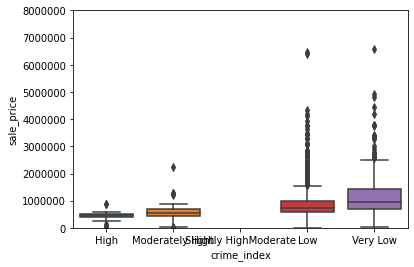

In [28]:
order=['High', 'Moderately High', 'Slightly High' 'Moderate', 'Low', 'Very Low']


boxplot = sns.boxplot(x='crime_index', y='sale_price', data=df, order=order)
plt.ylim(0,8000000)
plt.ticklabel_format(style='plain', axis='y')

In [58]:
#df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df.index.freq = 'D'
#df.index

In [237]:
df_trimmed.to_csv('Data/house_data_details_eda.csv', index=False)